# 3 LAYER NET.

BROKEN AI
3 layer per allenamento con MNIST

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


# split dataset into training and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train1=x_train
y_train1=y_train
x_test1=x_test
y_test1=y_test

In [2]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [3]:
x_train = x_train.reshape(60000, 784)

x_test = x_test.reshape(10000, 784)

In [4]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)

y_test = to_categorical(y_test, num_classes=10)

In [5]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [6]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))


C:\Users\tony3\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",#oppure adam per avere learning rate adattivo
              metrics = ['accuracy'])

In [9]:
import time
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping 
keras_callbacks = ReduceLROnPlateau(
    monitor= 'val_loss',     # Metrica da monitorare (qui è la loss di validazione) 
    factor=0.95,             # Riduci il learning rate: Moltiplicatore per ridurre il learning rate (nuovo_lr = lr * factor)
    patience=1,             # Aspetta 1 epoche senza miglioramenti prima di ridurre LR
    verbose=1,              # Mostra un messaggio quando il learning rate viene ridotto
    min_lr=0,             # Learning rate minimo
    min_delta=0.05      # min_delta=quantità minima di miglioramento richiesta per considerare il valore della perdita come un miglioramento
)


#per modificare epochs e batch_size modificare rispettivamente 'e' e 'b' (verranno modificati anche nella cnn)
e=30
b=700



#altro callbacks con Earlystopping
keras_callbacks1 = [EarlyStopping(monitor='val_loss', patience=6, verbose=1, min_delta=0.001)]
#min_delta=quantità minima di miglioramento richiesta per considerare il valore della perdita come un miglioramento


start_time = time.time() #registra tempo di inizio
history = model.fit(x_train, y_train, epochs=e, batch_size=b, verbose=1,
                    validation_split=0.2, callbacks=[keras_callbacks,keras_callbacks1])

end_time = time.time() ##registra tempo di fine


#model.fit(x_train, y_train, batch_size=60000, epochs=100,validation_split=0.2)


Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1008 - loss: 2.3137 - val_accuracy: 0.1395 - val_loss: 2.2852 - learning_rate: 0.0100
Epoch 2/30
62/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1414 - loss: 2.2814
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.009499999787658453.
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1424 - loss: 2.2807 - val_accuracy: 0.1663 - val_loss: 2.2616 - learning_rate: 0.0100
Epoch 3/30
63/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1644 - loss: 2.2586
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.009024999709799886.
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1647 - loss: 2.2581 - val_accuracy: 0.1773 - val_loss: 2.2418 - learning_rate: 0.0095
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1765 - loss: 2.2389 - val_accuracy: 0.1898 - val_loss: 2.2232 - learning_rate: 0.0090
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1922 - loss: 2.2207
Epoch 5: ReduceLROn

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', round(test_acc,4))
print('Test loss:', round(test_loss,4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4166 - loss: 1.7484
Test accuracy: 0.4161
Test loss: 1.7297


In [11]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')
   
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


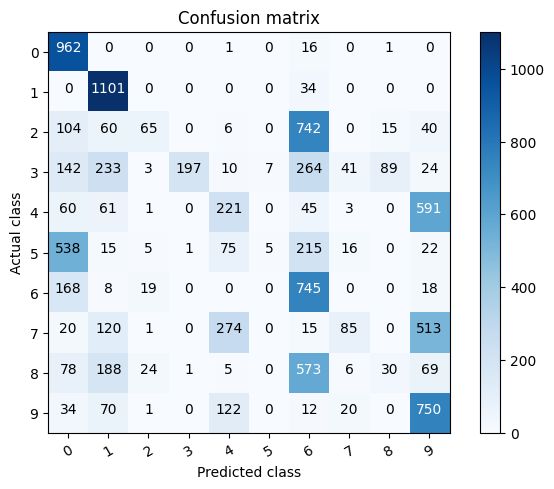

In [12]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))



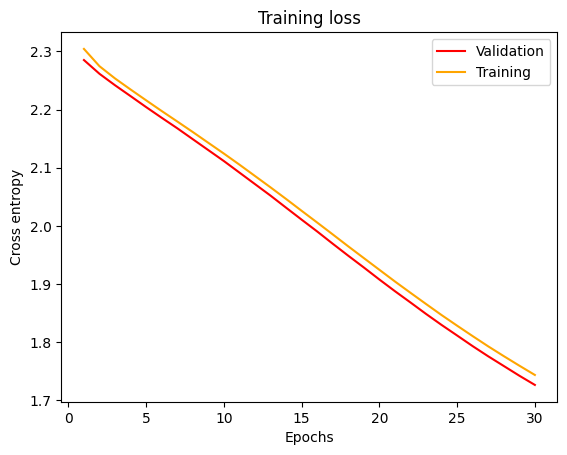

In [13]:
#plot loss-rate
val_losses=history.history["val_loss"]
train_losses=history.history["loss"]

epochs = range(1, len(val_losses) + 1)

plt.figure()
plt.title("Training loss")
plt.plot(epochs,val_losses,c="red",label="Validation")
plt.plot(epochs,train_losses,c="orange",label="Training")
plt.xlabel("Epochs")
plt.ylabel("Cross entropy")
plt.legend()
plt.savefig("loss_ANN.png")

# rete modello (CNN)
implemento una rete modello perfettamente funzionante (tale cnn con 8 layer è più stabile e meglio ottimizzata, ottima accuracy e loss basso).
tale modello può essere utile per un eventuale confronto dei dati in output della rete ANN con un set di dati che simuli 'le risposte di un paziente perfettamente sano'
NOTA:per quanto ottima la CNN non è perfetta potrà sbagiare qualche test, quindi questo introduce un certo margine d'errore per la rete ANN. 

In [14]:
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D

x_train_cnn=x_train1.reshape(x_train1.shape[0],x_train1.shape[1],x_train1.shape[2],1)
x_test_cnn=x_test1.reshape(x_test1.shape[0],x_test1.shape[1],x_test1.shape[2],1)

y_train_cat=to_categorical(y_train1)

    # definiamo il modello in maniera funzionale
cnn= Sequential()
cnn.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(strides=2))
cnn.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
cnn.add(MaxPooling2D(strides=2))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

    # definizione dell'ottimizzatore
    #opt=Adam(learning_rate=1e-3) #algoritmo di ottimizzazione, learning rate indica il tasso di apprendimento

    # compiliamo il modello prima dell'addestramento
cnn.compile(optimizer="adam",
                       loss='categorical_crossentropy', #loss function
                       metrics=['accuracy'])
keras_callbacks = [
EarlyStopping(monitor='val_loss', patience=5, verbose=1, min_delta=0.001)#quantità minima di miglioramento richiesta per considerare il valore della perdita come un miglioramento
]
start_time = time.time() #registra tempo di inizio
history = cnn.fit(x_train_cnn, y_train_cat, epochs=e, batch_size=b, verbose=1,
                    validation_split=0.2, callbacks=keras_callbacks)
    
   

end_time = time.time() ##registra tempo di fine
    
cnn_predictions = cnn.predict(x_test1)
y_test_cnn = to_categorical(y_test1, num_classes=10)

test_loss_R, test_acc_R = cnn.evaluate(x_test_cnn, y_test_cnn)
print('Test accuracy cnn:', round(test_acc_R,4))
print('Test loss cnn:', round(test_loss_R,4))

C:\Users\tony3\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 17s 190ms/step - accuracy: 0.5159 - loss: 7.2952 - val_accuracy: 0.9582 - val_loss: 0.1329
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - accuracy: 0.9646 - loss: 0.1125 - val_accuracy: 0.9735 - val_loss: 0.0812
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 181ms/step - accuracy: 0.9818 - loss: 0.0583 - val_accuracy: 0.9812 - val_loss: 0.0666
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - accuracy: 0.9881 - loss: 0.0381 - val_accuracy: 0.9810 - val_loss: 0.0614
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - accuracy: 0.9911 - loss: 0.0272 - val_accuracy: 0.9837 - val_loss: 0.0537
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accuracy: 0.9837 - val_loss: 0.0567
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 182ms/step - accuracy: 0.9959 - loss: 0.0138 - val_accuracy: 0.9833 - val_loss: 0.0597
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 181ms/step - accuracy: 0.9977 - loss: 0.0094 - val_accu

# simulazione 
comportamento di un paziente (non bravo) a cui vengono proposte immagini da classificare (MNIST) e confronto con un paziente perfettamente sano

In [15]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


quale immagine vuoi che legga? fornire un numero da 0 a 10.000: 4


io ho interpretato l'immagine numero 4 come: 4

ecco la predizione che mi ha permesso di fare questa scelta:

 [0.13337982 0.05564607 0.07522098 0.0470721  0.19254811 0.09336125
 0.07023018 0.11956776 0.03375496 0.17921872]

la risposta corretta è: 4

 il paziente modello avrebbe risposto: 4


vuoi che mostri l'immagine selezionata?



 si


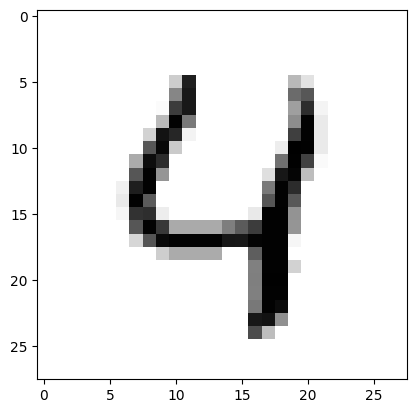

I due pazienti hanno fornito un numero di risposte uguali pari a: 41620,
 il 'paziente in esame' ha fornito il 41.62% delle risposte che il paziente modello ha fornito.



vuoi che legga un'altra immagine?
 no


se non è 'si' per me è no ;), alla prossima!


In [16]:

b="si"
while b=="si":
    a=input("quale immagine vuoi che legga? fornire un numero da 0 a 10.000:")
    
    print("io ho interpretato l'immagine numero {} come: {}".format(a,np.argmax(predictions[int(a)])))
    print("\necco la predizione che mi ha permesso di fare questa scelta:\n\n",predictions[int(a)])
    #print(np.sum(predictions[int(a)]))
    print("\nla risposta corretta è:",y_test1[int(a)])
    print("\n il paziente modello avrebbe risposto: {}\n".format(np.argmax(cnn_predictions[int(a)])))
    print("\nvuoi che mostri l'immagine selezionata?\n") 
    if input()=='si':
        plt.imshow(x_test1[int(a)], cmap=plt.cm.binary)
        plt.show()
    
    for i in range(9999):
        predictions[int(i)]=np.argmax(predictions[int(i)])
        cnn_predictions[int(i)]=np.argmax(cnn_predictions[int(i)])
        
    #print( predictions)
    uguali =np.sum(np.array(cnn_predictions) == np.array(predictions))
    percentuale = (uguali / cnn_predictions.size) * 100

    print("I due pazienti hanno fornito un numero di risposte uguali pari a: {},\n il 'paziente in esame' ha fornito il {:.2f}% delle risposte che il paziente modello ha fornito.".format(uguali, percentuale))

    b=input("\nvuoi che legga un'altra immagine?\n")
    
print("se non è 'si' per me è no ;), alla prossima!")
